In [37]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

%config InlineBackend.figure_format = 'retina' # 폰트를 선명하게~

C:\Users\minir\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
result=pd.read_csv("C:\\Users\\minir\\OneDrive\\바탕 화면\\지치안\\주소정리.csv")

C:\Users\minir\AppData\Local\Temp\ipykernel_16168\1252426940.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  result=pd.read_csv("C:\\Users\\minir\\OneDrive\\바탕 화면\\지치안\\주소정리.csv")


In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415070 entries, 0 to 415069
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          415070 non-null  int64  
 1   주소포함인덱스        415070 non-null  int64  
 2   제공자료인덱스        415070 non-null  int64  
 3   RECV_DEPT_NM   415070 non-null  object 
 4   RECV_CPLT_DM   415070 non-null  object 
 5   NPA_CL         415070 non-null  int64  
 6   EVT_STAT_CD    415070 non-null  int64  
 7   EVT_CL_CD      415070 non-null  int64  
 8   RPTER_SEX      415070 non-null  object 
 9   HPPN_PNU_ADDR  415070 non-null  object 
 10  HPPN_X         415053 non-null  float64
 11  HPPN_Y         415053 non-null  float64
 12  SME_EVT_YN     136673 non-null  object 
 13  요일             415070 non-null  object 
 14  구분             415070 non-null  object 
 15  지역             415070 non-null  object 
 16  시/군/구          415070 non-null  object 
dtypes: float64(2), int64(6), obje

In [5]:
result.head()

,index,주소포함인덱스,제공자료인덱스,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,요일,구분,지역,시/군/구
0,0,151,1865,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,충청남도 공주시 정안면 어물리,공주시
1,1,153,1892,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,충청남도 논산시 채운면 장화리,논산시
2,2,152,1888,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,세종특별자치시 세종시 소담동,소담동
3,3,154,1914,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,충청남도 천안시 서북구 불당동,천안시
4,4,2,54,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,대전광역시 유성구 봉명동,유성구


In [16]:
result.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별","HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)

In [26]:
result.head(20)

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,지역,시/군/구
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,충청남도 공주시 정안면 어물리,공주시
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,충청남도 논산시 채운면 장화리,논산시
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,세종특별자치시 세종시 소담동,소담동
3,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,충청남도 천안시 서북구 불당동,천안시
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,대전광역시 유성구 봉명동,유성구
5,충남청,2020-01-01 00:21:54,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,세종특별자치시 세종시 소담동,소담동
6,충남청,2020-01-01 00:29:48,19,10,403,1,충청남도 천안시 동남구 목천읍 삼성리(목천읍) 203-19,127.170556,36.762500,NaN,Wednesday,충남,충청남도 천안시 동남구 목천읍 삼성리,천안시
7,충남청,2020-01-01 00:32:03,19,10,406,1,충청남도 서산시 읍내동(행정:부춘동) 585-1,126.444094,36.786189,NaN,Wednesday,충남,충청남도 서산시 읍내동,서산시
8,대전청,2020-01-01 00:32:40,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,Wednesday,대전,대전광역시 서구 탄방동,서구
9,대전청,2020-01-01 00:35:32,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,Wednesday,대전,대전광역시 유성구 궁동,유성구


In [18]:
del result["주소포함인덱스"]

In [19]:
del result["제공자료인덱스"]

In [20]:
del result["index"]

In [22]:
result.info() # 동일사건여부 결측치 처리 논의 필요 /  아예 삭제해도 될 듯?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415070 entries, 0 to 415069
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   접수부서코드  415070 non-null  object 
 1   접수완료일시  415070 non-null  object 
 2   경찰청구분   415070 non-null  int64  
 3   사건상태코드  415070 non-null  int64  
 4   사건종별코드  415070 non-null  int64  
 5   신고성별    415070 non-null  object 
 6   발생지점    415070 non-null  object 
 7   발생좌표x   415053 non-null  float64
 8   발생좌표y   415053 non-null  float64
 9   동일사건여부  136673 non-null  object 
 10  요일      415070 non-null  object 
 11  구분      415070 non-null  object 
 12  지역      415070 non-null  object 
 13  시/군/구   415070 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 44.3+ MB


In [23]:
# result2=result[(result["사건종별코드"]==403) | (result["사건종별코드"]== 406) |(result["사건종별코드"]== 402)|(result["사건종별코드"]== 401)|(result["사건종별코드"]== 404)|(result["사건종별코드"]== 405)]


In [29]:
result.tail()

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,지역,시/군/구
415065,대전청,2023-01-18 23:23:38,13,10,406,1.0,대전광역시 중구 문화동 (행정:문화1동 ) 1-266,127.414486,36.321280,Y,Wednesday,대전,대전광역시 중구 문화동,중구
415066,충남청,2023-01-18 23:32:32,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741950,36.868136,Y,Wednesday,충남,충청남도 당진시 신평면 상오리,당진시
415067,충남청,2023-01-18 23:34:30,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741930,36.868214,Y,Wednesday,충남,충청남도 당진시 신평면 상오리,당진시
415068,대전청,2023-01-18 23:35:52,13,10,406,2.0,대전광역시 서구 월평동 (월평1동 ) 1526,127.357785,36.355010,NaN,Wednesday,대전,대전광역시 서구 월평동,서구
415069,충남청,2023-01-18 23:59:40,19,10,406,1.0,충청남도 아산시 모종동 (온양3동 ) 661,127.019848,36.778266,NaN,Wednesday,충남,충청남도 아산시 모종동,아산시


In [28]:
# 총 발생건수 : 415,070
# 20~23 년도 교통 관련 사건 발생 건수

print("교통사고 발생건수 :",len(result[result["사건종별코드"]==401]))
print("교통불편 발생건수 :",len(result[result["사건종별코드"]==402]))
print("교통위반 발생건수 :",len(result[result["사건종별코드"]==403]))
print("사망,대형사고 발생건수 :",len(result[result["사건종별코드"]==404]))
print("인피도주 발생건수 :",len(result[result["사건종별코드"]==405]))
print("음주운전 발생건수 :",len(result[result["사건종별코드"]==406]))

교통사고 발생건수 : 255225
교통불편 발생건수 : 58505
교통위반 발생건수 : 33519
사망,대형사고 발생건수 : 21
인피도주 발생건수 : 45
음주운전 발생건수 : 67755


In [33]:
result401=len(result[result["사건종별코드"]==401])
result402=len(result[result["사건종별코드"]==402])
result403=len(result[result["사건종별코드"]==403])
result404=len(result[result["사건종별코드"]==404])
result405=len(result[result["사건종별코드"]==405])
result406=len(result[result["사건종별코드"]==406])

In [34]:
result_list=[["교통사고",result401],["교통불편",result402],["교통위반",result403],["사망,대형사고",result404],["인피도주",result405],
        ["음주운전",result406]]

In [39]:
resultdf=pd.DataFrame(result_list, columns=["종류","발생건수"])
resultdf=resultdf.set_index("종류")

Text(0.5, 1.0, '<20~23년도 사건 종류별 발생건수>')

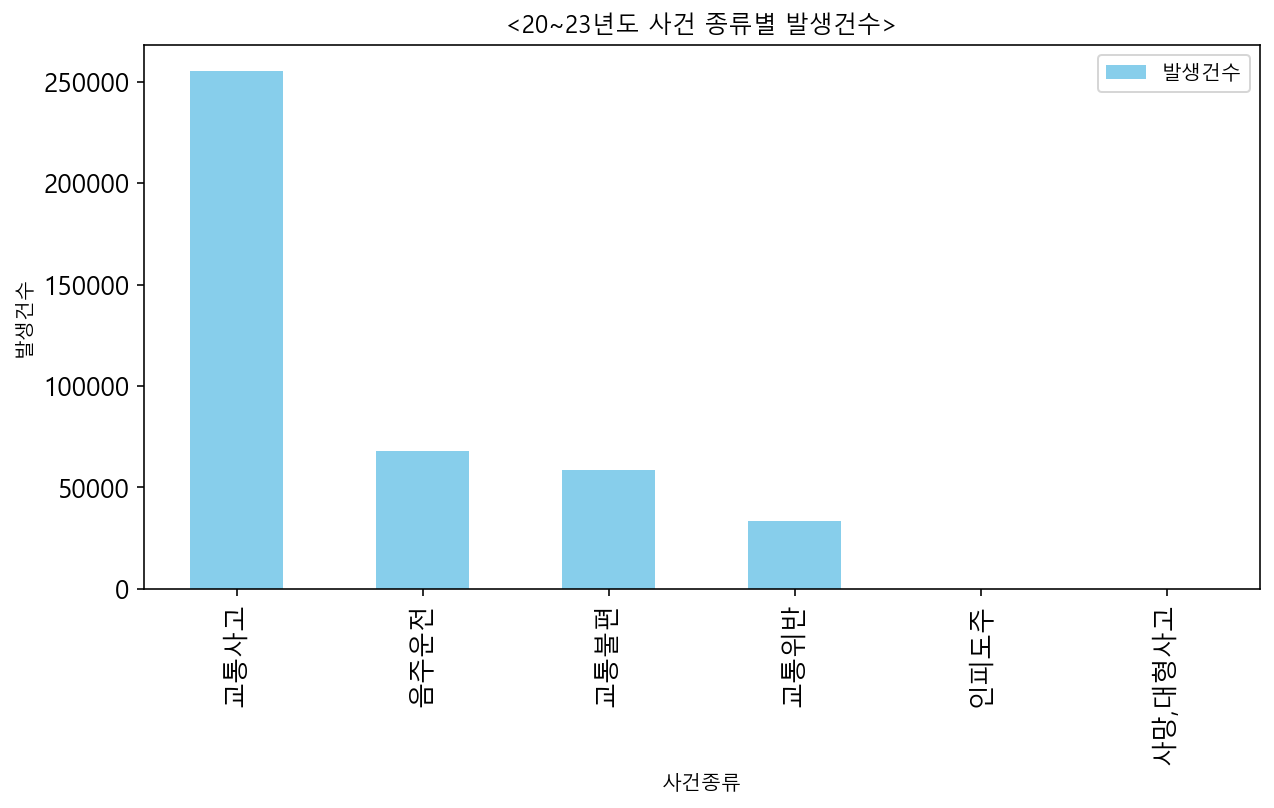

In [43]:
resultdf=resultdf.sort_values("발생건수", ascending=False)

resultdf.plot(kind="bar", figsize=(10,5), color="Skyblue", fontsize=13)
plt.xlabel("사건종류")
plt.ylabel("발생건수")
plt.title("<20~23년도 사건 종류별 발생건수>")

# 0208 지치안 

<날씨데이터>
 - 충남지역은 천안 날씨 적용
 - 날씨데이터 처리(범주화)
 
<시각화파트>
 - 기존에 만들었던 시각화 자료 병합한 csv로 리뉴얼하기
 - 서론파트는 전체 범죄 건수로 적용(좀 더 고려해보기)
 - 추가 제작할 것
     - 시간별 범죄건수 그래프 만들기
     
 - 추가 및 리뉴얼 자료 0209 12시까지 노션에 간단한 설명과 함께 올려주세요
     
<서론 - 왜 교통인가?>
 - 교통사건은 간단하면서도 큰 사고로 이어질 수 있음과 동시에 인재이기 때문에 주의를 기울인다면 사전에 예방할 수 있기 때문




